In [1]:

import importlib
import shiftNMF_frozen
importlib.reload(shiftNMF_frozen)
from shiftNMF_frozen import ShiftNMF
#from shiftNMFDiscTau import ShiftNMF
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_ART, X_ART_NOISY, TAU_ART, W_ART, H_ART
from Hardmodel_single_peaks import Single_Model
from Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools
from helpers.fit_functions import *
from helpers.plot import *
import torch

# Data

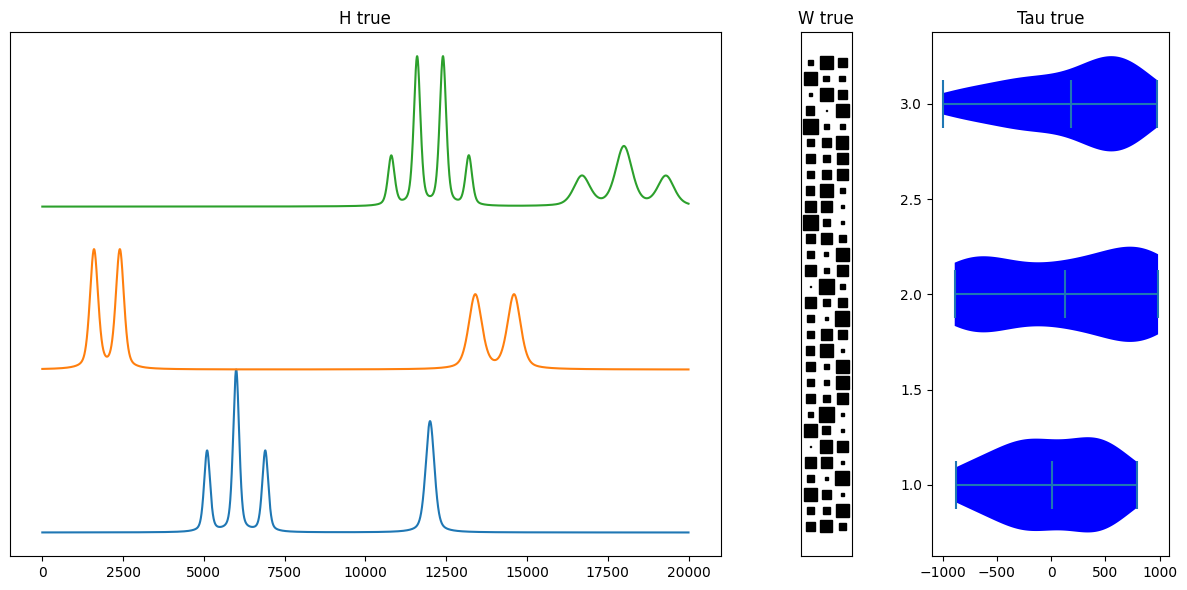

In [2]:
# Create a gridspec object with 2 rows and 3 columns
from helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

fig = plt.figure(figsize=(12, 6))
N, M = X_ART.shape

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, np.arange(H_ART.shape[1]), H_ART.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_ART.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(TAU_ART, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

# shiftNMF

In [4]:

torch.manual_seed(40)

nmf = ShiftNMF(X_ART_NOISY, 3, lr=0.1, alpha=1e-6, patience=30, min_imp=-10000, normalize_components=False)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=1000, tau_iter=0)


epoch: 1000, Loss: 0.07025785891097724, Tau: 6149.764304426634


Found peaks:[ 1500  2285  3088 14095 15292]
sigma: 254.33972380645946 n:0.9999689157013812
sigma: 294.68238615020675 n:1.490070868178596e-07
sigma: 305.62758467244134 n:0.08345857038991447
sigma: 557.0166869297925 n:0.0046574674750244315
sigma: 478.2624523898355 n:0.1266606090894204
Lorentzian %:ss: 0.010591601504531402
tensor([1.0000e+00, 2.5926e-09, 6.9284e-16, 5.5916e-16, 4.0315e-16],
       grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([357.3273, 315.3210, 327.0152, 623.2120, 522.0614], requires_grad=True)
hypothesises:
{(0, 1, 3, 4), (2,), (3, 4), (0, 1, 3), (1, 2, 3, 4), (0, 2), (1, 3), (0, 2, 4), (0, 1, 2, 4), (4,), (1,), (0, 2, 3, 4), (0, 1, 2), (1, 2, 4), (0, 1), (2, 4), (1, 2), (0, 4), (0, 2, 3), (0, 1, 2, 3), (0,), (3,), (0, 1, 4), (0, 3, 4), (0, 3), (1, 2, 3), (1, 4), (1, 3, 4), (2, 3), (2, 3, 4), (0, 1, 2, 3, 4)}
Loss: 0.012742313427686162
means:
[14693.5  2291.   2686.5]
sigmas:
[572.6367  333.22116 321.1681 ]
J coupling:
[1197.  785.  803.]
multiplicity

c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=3.65774e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


Loss: 0.022909521721355908
means:
[ 5578.      6028.6665 12026.    ]
sigmas:
[228.11868 225.64241 370.52484]
J coupling:
[898. 898.   0.]
multiplicity
[2 3 1]
N
[1.0935821e-04 2.5999520e-03 2.4729410e-09]
W:
[[  5.596871   0.         0.       235.24954    0.         0.
    0.         0.         0.         0.         0.       370.02673 ]]
Found peaks:[10961 11759 12556 13361 16865 18157 19452]
sigma: 226.3322545289538 n:0.8302317642140895
sigma: 245.45761121071905 n:3.663807431269957e-06
sigma: 246.25219523652765 n:0.05180350667642819
sigma: 257.72767704716193 n:0.7164615955407561
sigma: 538.9749055106831 n:0.7907514542468586
sigma: 591.7826798034478 n:2.0860784595229088e-07
sigma: 678.7474204621464 n:0.19284774976399371
Lorentzian %:ss: 0.011789518249295592
tensor([1.0000e+00, 1.5771e-09, 1.2134e-13, 1.0000e+00, 9.9990e-01, 9.9165e-09,
        2.0936e-10], grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([253.0389, 260.3458, 263.3959, 287.0785, 557.3871, 613.7780, 754.88

c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.86206e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.3197e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.19345e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=4.57151e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


Loss: 0.02714097110748188
means:
[12159.25 18158.   17511.   11360.  ]
sigmas:
[265.96475 642.01666 585.5825  256.69235]
J coupling:
[ 798. 1292. 1292.  798.]
multiplicity
[4 3 2 2]
N
[8.0437511e-02 2.7442236e-05 9.8378742e-03 9.6685934e-01]
W:
[[  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.        282.40488
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.        547.7274      0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.       

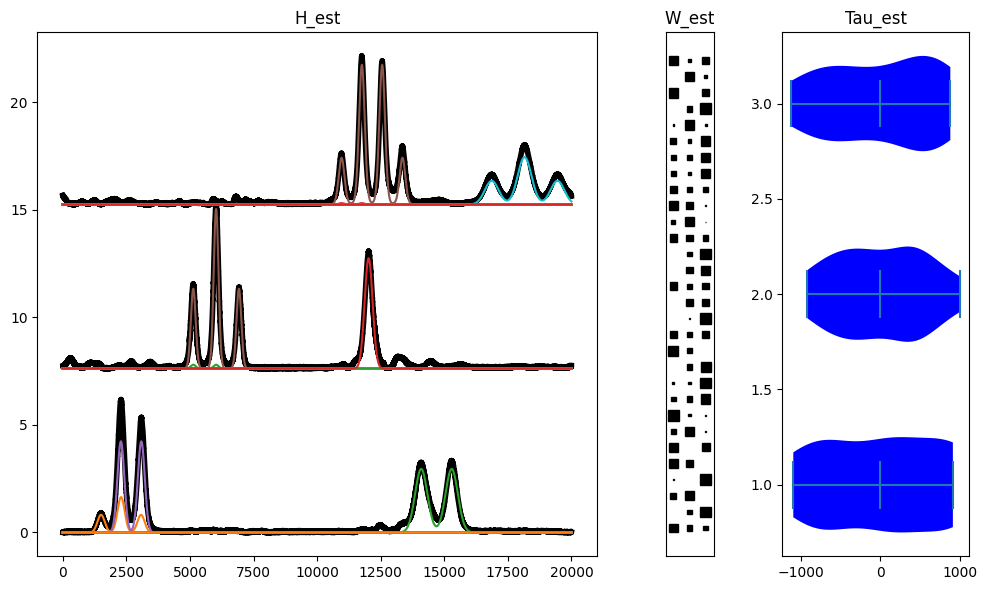

In [5]:

fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')
x = np.arange(H_est.shape[1])

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []
losses = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], plot=False)
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n)

    W, C, running_loss, path, lambdas, loss = hardmodel.fit(verbose=True, return_loss=True)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    losses.append(loss)
    means, sigma, j_coup, mult, n, w = hardmodel.return_values()
    print("means:")
    print(means)
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(x,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(x,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[1.0, 0.7025998989051357, 0.6670907038619145, 0.11312038573961031, 0.10404651342961667, 0.10354344722668028, 0.10195271690133585, 0.10194009456652989, 0.10190383309122372, 0.09619800465090136, 0.09460328450970651, 0.09411414536139878, 0.09393230635898013, 0.09368264521699457, 0.09363121918148332, 0.09353092169762499, 0.0929945253788162, 0.0928643723176482, 0.09253972792648638, 0.09242809832853, 0.09226932229829354, 0.09226866773982785]
[14  2 11 13 18  8  7  3  1 16  9 20 12  0 10  6  5  4 15 17 19 21]


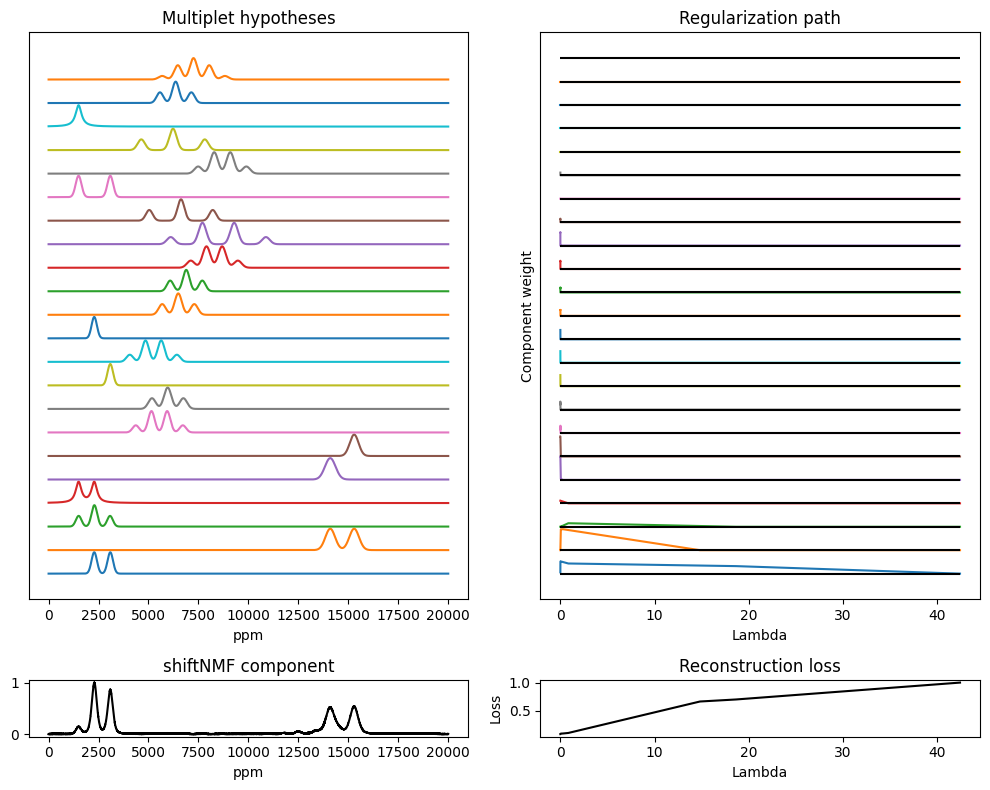

[1.0, 0.9838311994837776, 0.652412673763757, 0.15136501882482906, 0.15055408848231736, 0.13761800681299977, 0.13752435594563459, 0.13742907128279952, 0.13742840607201098, 0.13737728135388969, 0.13720796682352737, 0.1371067440629603]
[ 3 11  0  8  7  5 10  1  2  4  6  9]


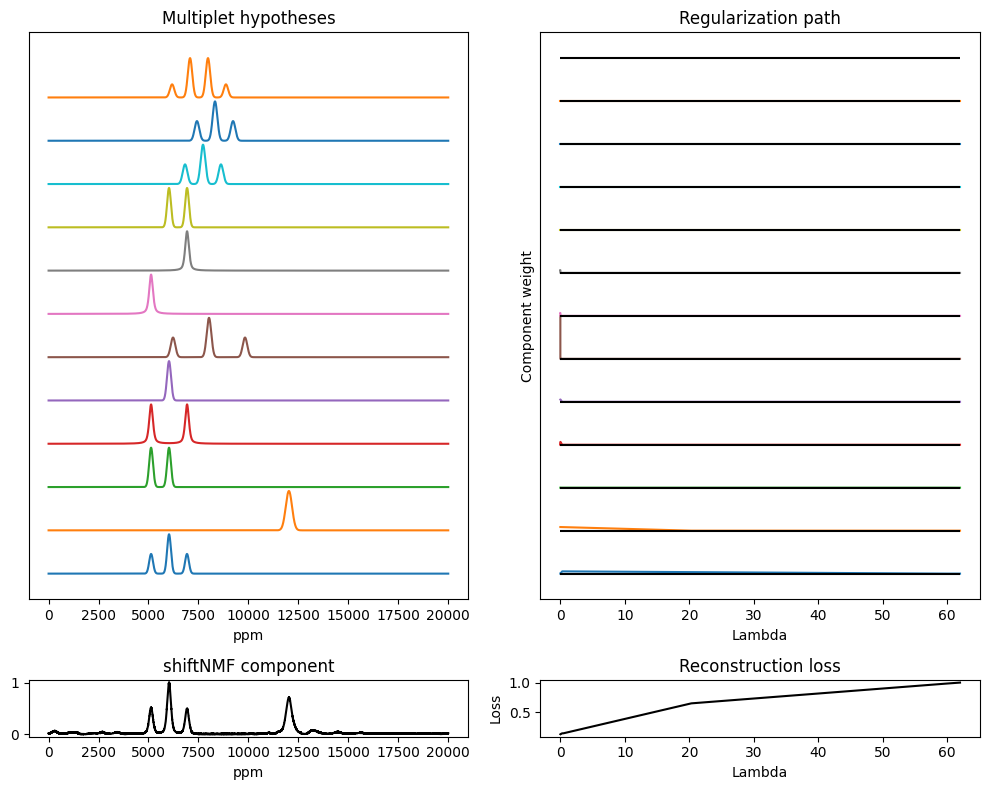

[1.0, 0.4911632198865416, 0.44454697101378826, 0.18582747762916166, 0.16424192630236376, 0.16015171651109106, 0.14521735627116342, 0.14261593103070977, 0.12586236451088606, 0.12374262679377494, 0.12352923149848405, 0.12212673372814539, 0.11065291322062147, 0.10864526184202691, 0.10351801558960147, 0.10335474911155529, 0.10289631404308683, 0.10202483798593612, 0.10119635159528012, 0.10115170050054037, 0.10041697134893132, 0.09954473064909751, 0.09941812402978559, 0.09893219082635965, 0.09681453903034865, 0.09654869499753992, 0.09647491374836187, 0.09182038986719275, 0.09132884346965504, 0.09119384576843345, 0.09088375335598428, 0.09044525194146776, 0.08991964360187259, 0.08976159060902385, 0.08918703191300263, 0.08889227795419506, 0.0887047356897974, 0.08800622878644772, 0.08790358316594714, 0.08747719275207974, 0.08709545302961315, 0.08691666107460622, 0.08673547610064311, 0.0866930377230269, 0.08664155736680203, 0.08660632916824511, 0.08654031282256142, 0.08653193552620764, 0.08653056

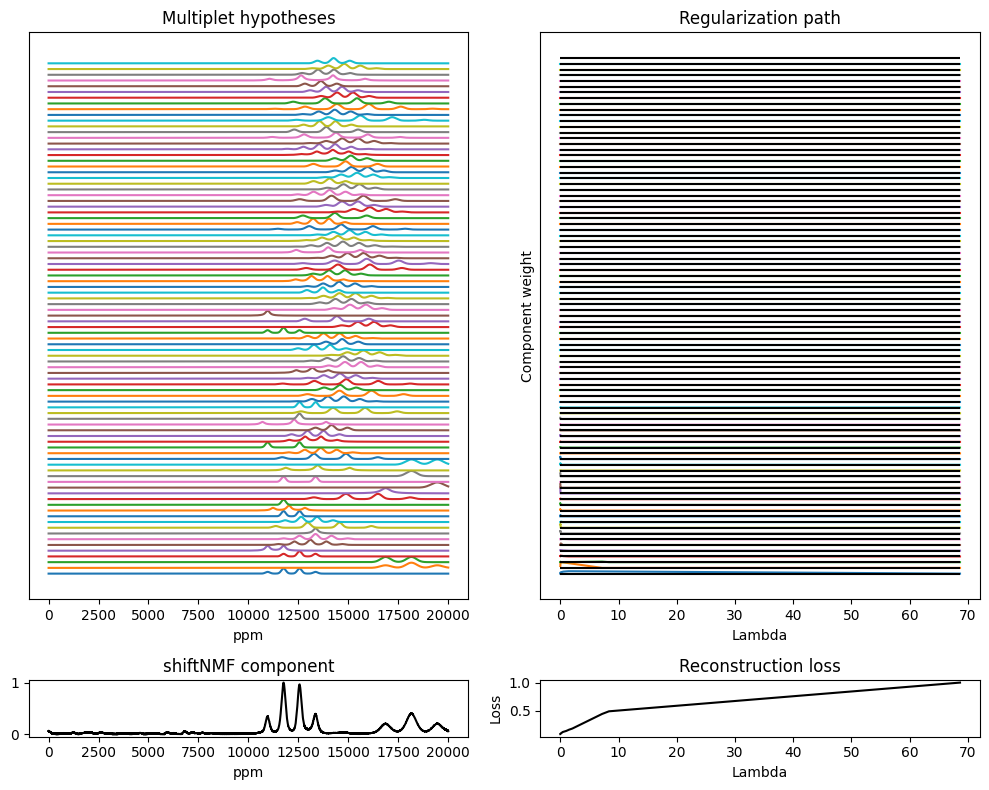

In [8]:

for i in range(len(reg_paths)):
    path = reg_paths[i][0]
    lambdas = lambda_axis[i][0]
    C = C_path[i]
    loss = losses[i]
    print(loss)
    fig = plt.figure(figsize=(10, 8))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regularization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ax3 = plt.subplot(gs[2])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax3.set_title('shiftNMF component')
    ax3.plot(H_est[i]/max(H_est[i]), color="k")
    ax3.set_xlabel("ppm")

    ax4 = plt.subplot(gs[3])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax4.set_title('Reconstruction loss')
    ax4.plot(lambdas, loss, color="k")
    ax4.set_xlabel("Lambda")
    ax4.set_ylabel("Loss")

   
    sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
    print(sort_indices)
    path = path[sort_indices]
    C = C[sort_indices]

    ymax = 1.1
    yoffset = ymax
    t = 0

    nr_of_components = len(C)

    for j in range(nr_of_components):
            ax1.plot(x,C[j]/max(C[j])+yoffset*t)
            t += 1

    
    ymax = path.max()
    yoffset = ymax
    t = 0
    for j in range(nr_of_components):
            ax2.plot(lambdas,path[j]+yoffset*t)
            ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")


    plt.tight_layout()
    plt.savefig("pat"+str(i))
    plt.show()

# peak finding (single fit)

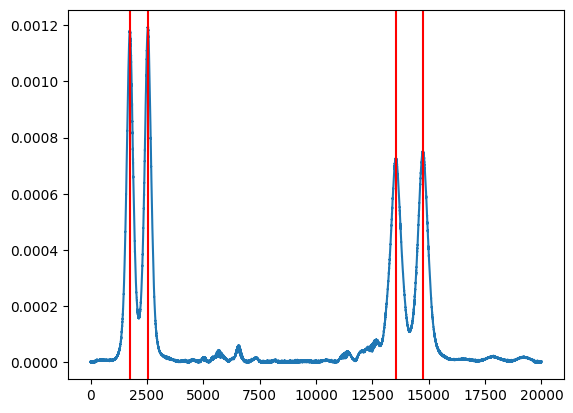

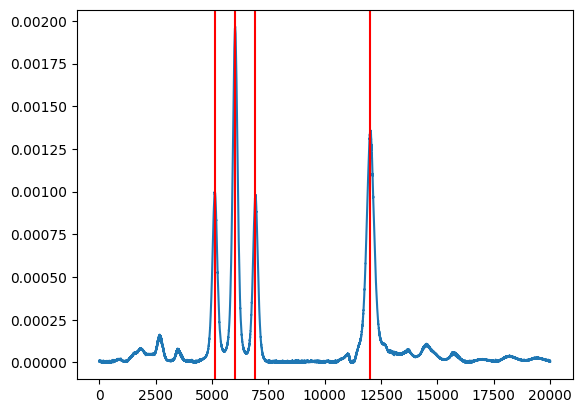

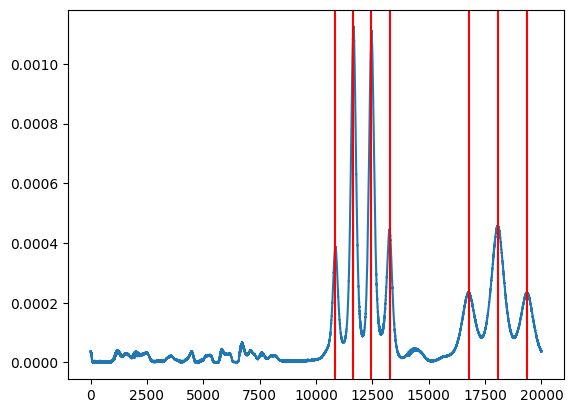

In [5]:

for i in range(len(H_est)):
    plt.plot(H_est[i])
    #peaks = find_peaks_cwt(H_est[i], [100,300])
    peaks = find_peaks(H_est[i], height=max(H_est[i])/10)[0]
    sigmas = scipy.signal.peak_widths(H_est[i], peaks, wlen=1000)[0]/2 #.355*1.5
    select = [sig>100 for sig in sigmas]
    select = [i for i, x in enumerate(select) if x == False]
    sigmas = np.delete(sigmas, select)
    peaks = np.delete(np.array(peaks), select)
    for mean in peaks:
        plt.axvline(mean, color='r')
    plt.show()

# Hardmodel

In [6]:
for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i])
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)
    W, C = hardmodel.fit(verbose=True, alpha=0.2)
    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5)

    for i, vec in enumerate(C):
        plt.plot(vec*W[:,i])
    plt.title("C weigthed")
    plt.show()

Found peaks:[ 1748  2549 13549 14743]


KeyboardInterrupt: 